In [1]:
import requests
from datetime import datetime
import numpy as np
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

In [2]:
from config import weather_api_key

In [3]:
# print 500 random lats
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180,180,1500)
lat_lngs = list(zip(lats,lngs))

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# print(cities)

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = ""
units = "Imperial"
# query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eureka
Processing Record 2 of Set 1 | santa ana
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | tandahimba
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | zeya
Processing Record 19 of Set 1 | keti bandar
Processing Record 20 of Set 1 | pitimbu
Processing Record 21 of Set 1 | paranaiba
Processing Record 22 of Set 1 | san vicente
Processing Recor

Processing Record 39 of Set 4 | batagay-alyta
Processing Record 40 of Set 4 | cesis
Processing Record 41 of Set 4 | muri
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | sorong
Processing Record 44 of Set 4 | nyurba
Processing Record 45 of Set 4 | maceio
Processing Record 46 of Set 4 | kaeo
Processing Record 47 of Set 4 | warqla
City not found. Skipping...
Processing Record 48 of Set 4 | san andres
Processing Record 49 of Set 4 | cochrane
Processing Record 50 of Set 4 | uige
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | belozerskoye
Processing Record 4 of Set 5 | boyolangu
Processing Record 5 of Set 5 | loiza
Processing Record 6 of Set 5 | dicabisagan
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | mujiayingzi
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 5 | juruti
Processing Record 11 of Set 5 | port augusta
Processing Record 

Processing Record 25 of Set 8 | vigrestad
Processing Record 26 of Set 8 | mazyr
Processing Record 27 of Set 8 | honningsvag
Processing Record 28 of Set 8 | tura
Processing Record 29 of Set 8 | dali
Processing Record 30 of Set 8 | mecca
Processing Record 31 of Set 8 | san joaquin
Processing Record 32 of Set 8 | guerrero negro
Processing Record 33 of Set 8 | khani
Processing Record 34 of Set 8 | vidim
Processing Record 35 of Set 8 | mishelevka
Processing Record 36 of Set 8 | kristiansund
Processing Record 37 of Set 8 | paita
Processing Record 38 of Set 8 | atar
Processing Record 39 of Set 8 | san antonio del tachira
Processing Record 40 of Set 8 | leningradskiy
Processing Record 41 of Set 8 | play cu
City not found. Skipping...
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bilma
Processing Record 44 of Set 8 | sistranda
Processing Record 45 of Set 8 | bubaque
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | avera
Processing Record 48 of Se

Processing Record 13 of Set 12 | changji
Processing Record 14 of Set 12 | marzuq
Processing Record 15 of Set 12 | mersing
Processing Record 16 of Set 12 | malwan
City not found. Skipping...
Processing Record 17 of Set 12 | talara
Processing Record 18 of Set 12 | del rio
Processing Record 19 of Set 12 | vostok
Processing Record 20 of Set 12 | coahuayana
Processing Record 21 of Set 12 | rantauprapat
Processing Record 22 of Set 12 | uthal
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | abalak
Processing Record 25 of Set 12 | sidney
Processing Record 26 of Set 12 | tsiroanomandidy
Processing Record 27 of Set 12 | luanda
Processing Record 28 of Set 12 | pontal do parana
Processing Record 29 of Set 12 | nemuro
Processing Record 30 of Set 12 | ayan
Processing Record 31 of Set 12 | yoichi
Processing Record 32 of Set 12 | panguna
Processing Record 33 of Set 12 | magdagachi
Processing Record 34 of Set 12 | albanel
Processing Record 35 of Set 12 | cabedelo
Processing Recor

In [7]:
# check length of city data
print(len(city_data))

554


In [8]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country','Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eureka,US,2021-03-28 19:52:26,40.8021,-124.1637,52.00,93,90,6.87
1,Santa Ana,US,2021-03-28 19:51:44,33.7456,-117.8678,86.00,17,1,4.61
2,Nikolskoye,RU,2021-03-28 19:52:27,59.7035,30.7861,41.00,87,90,4.50
3,Busselton,AU,2021-03-28 19:52:27,-33.6500,115.3333,54.00,94,0,1.01
4,Tandahimba,TZ,2021-03-28 19:52:27,-10.7500,39.6333,71.80,93,93,1.81
...,...,...,...,...,...,...,...,...,...
549,Yokadouma,CM,2021-03-28 19:56:06,3.5167,15.0500,76.57,66,100,1.72
550,Prince George,CA,2021-03-28 19:52:30,53.9166,-122.7530,33.01,74,1,11.50
551,Mwinilunga,ZM,2021-03-28 19:56:07,-11.7358,24.4293,61.23,95,93,3.31
552,Ust-Maya,RU,2021-03-28 19:56:07,60.4167,134.5333,-2.22,99,100,1.52


In [9]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
today = time.strftime("%x")
print(today)

03/28/21


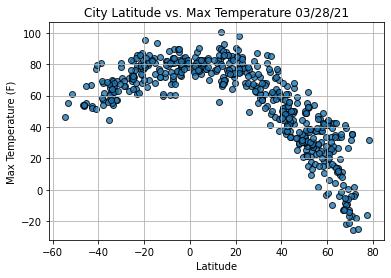

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

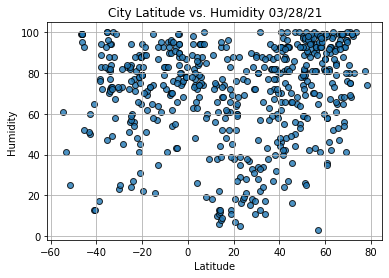

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig2.png")

# Show plot.
plt.show()

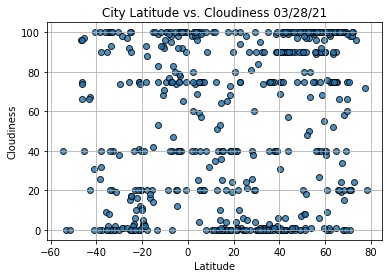

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig3.png")

# Show plot.
plt.show()

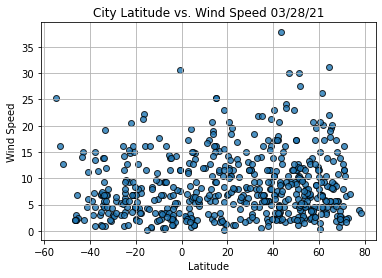

In [15]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r value is: {r_value}")
    print(f"The p value is: {p_value}")
    print(f"The standard error is: {std_err}")

In [17]:
# separate df by northern and southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Busselton,AU,2021-03-28 19:52:27,-33.6500,115.3333,54.00,94,0,1.01
4,Tandahimba,TZ,2021-03-28 19:52:27,-10.7500,39.6333,71.80,93,93,1.81
5,Caravelas,BR,2021-03-28 19:47:36,-17.7125,-39.2481,81.16,69,0,8.10
7,Ushuaia,AR,2021-03-28 19:52:29,-54.8000,-68.3000,46.40,61,40,25.32
8,Bredasdorp,ZA,2021-03-28 19:52:29,-34.5322,20.0403,62.60,82,100,13.80


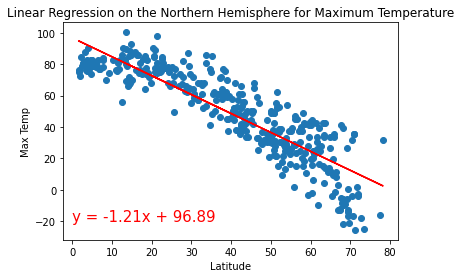

The r value is: -0.8782246307487158
The p value is: 8.632724792683951e-124
The standard error is: 0.03372282334736635


In [18]:
# Linear regression on the Northern Hemisphere and Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,-20))

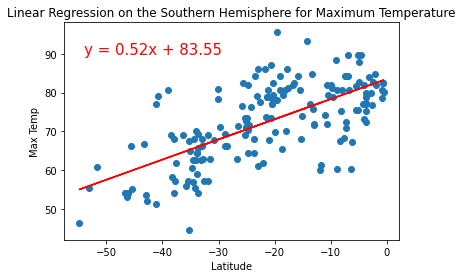

The r value is: 0.6779680621146916
The p value is: 1.698133440052891e-24
The standard error is: 0.04329081900322956


In [19]:
# Linear regression on the Southern Hemisphere and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-54,90))

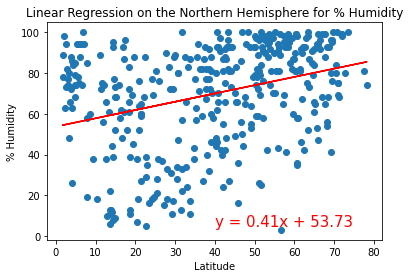

The r value is: 0.32361807238816365
The p value is: 9.202164544071257e-11
The standard error is: 0.06088531025753522


In [20]:
# Linear regression on the Northern Hemisphere and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,5))

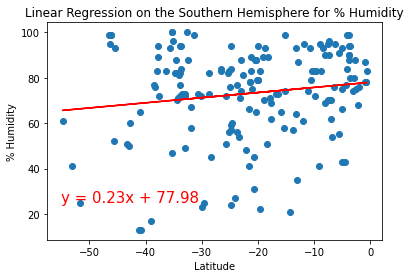

The r value is: 0.1500678445837247
The p value is: 0.04942446172493665
The standard error is: 0.11411684640285447


In [21]:
# Linear regression on the Southern Hemisphere and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,25))

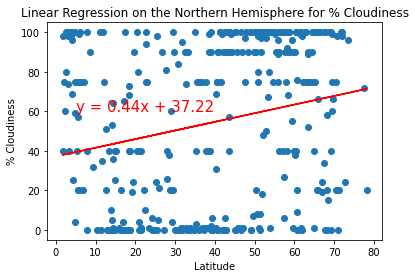

The r value is: 0.21763330407713669
The p value is: 1.777037274988585e-05
The standard error is: 0.1004416930413873


In [22]:
# Linear regression on the Northern Hemisphere and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,60))

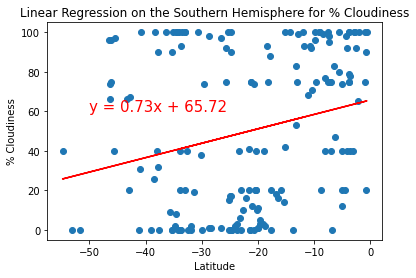

The r value is: 0.2473643559677538
The p value is: 0.0010698211433911725
The standard error is: 0.21892771108888395


In [23]:
# Linear regression on the Southern Hemisphere and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

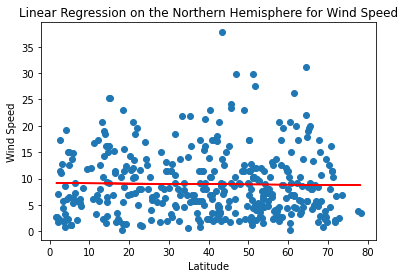

The r value is: -0.016425243925757605
The p value is: 0.7489698778940119
The standard error is: 0.01562694752152542


In [24]:
# Linear regression on the Northern Hemisphere and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,40))

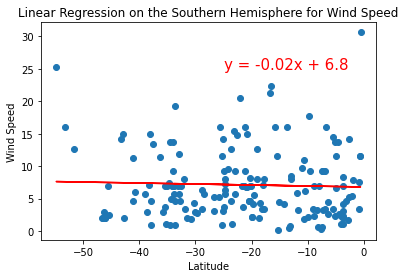

The r value is: -0.03821138979663939
The p value is: 0.6187199911345238
The standard error is: 0.03044863520254449


In [25]:
# Linear regression on the Southern Hemisphere and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,25))